### 1. Общая информация

#### Описание датасета
1. **school** — аббревиатура школы, в которой учится ученик: GP/MS
2. **sex** — пол ученика ('F' - женский, 'M' - мужской)
3. **age** — возраст ученика (от 15 до 22)
4. **address** — тип адреса ученика ('U' - городской, 'R' - за городом)
5. **famsize** — размер семьи('LE3' <= 3, 'GT3' >3)
6. **Pstatus** — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. **Medu** — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. **Fedu** — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. **Mjob** — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. **Fjob** — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. **reason** — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. **guardian** — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. **traveltime** — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. **studytime** — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. **failures** — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)
16. **schoolsup** — дополнительная образовательная поддержка (yes или no)
17. **famsup** — семейная образовательная поддержка (yes или no)
18. **paid** — дополнительные платные занятия по математике (yes или no)
19. **activities** — дополнительные внеучебные занятия (yes или no)
20. **nursery** — посещал детский сад (yes или no)
21. **higher** — хочет получить высшее образование (yes или no)
22. **internet** — наличие интернета дома (yes или no)
23. **romantic** — в романтических отношениях (yes или no)
24. **famrel** — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. **freetime** — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. **goout** — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. **health** — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. **absences** — количество пропущенных занятий
29. **score** — баллы по госэкзамену по математике

In [379]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import combinations
from scipy.stats import ttest_ind

In [380]:
pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [381]:
df = pd.read_csv(r'C:\Users\Nata\SkillFactory\dataset\U2\stud_math.csv')

### 2. Используемые функции

In [382]:
def rename_columns(df):
    '''renames columns according to PEP-8
       parameter: df - dataframe 
    '''
    new_names = []
    for col in df.columns:
        new_names.append(col.replace(', ','_').lower())
    df.columns = new_names   

In [383]:
def count_not_nulls(df):
    '''print nulls in columns
       parameter: df - dataframe 
    '''
    print("column - nulls(%) - quantity nulls")
    for col in df.columns:
        pct_missing = df[col].isna().mean()
        pct_missing_ed = df[col].isna().sum()
        if pct_missing > 0:
            print(f'{col} - {pct_missing :.1%} - ({pct_missing_ed})')

In [384]:
def convert_to_numeric(column, df, list_values, symmetry=True):
    '''
    convert values of column to numeric type
    parameters:
    colum -  name of the column , 
    df - dataframe,
    list_values - list of the text values to convert to numeric ones
    symmetry - attribute if the numeric series start with 0 or it will be symmetric on 0
    '''
    d={} #dictionary to transform the values
    d[0] = 0
    if len(list_values)%2==0 and symmetry: #used negative and positive values
        for i in range(len(list_values)):
            if i%2==0:
                d[list_values[i]] = i//2+1
            else:
                d[list_values[i]] = -i//2
    else:
        for i in enumerate(list_values):
            d[i[1]] = i[0]+1
    
    df[column].fillna(0, inplace=True)
    df[column] = df[column].map(d)
    

In [385]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
        data=new_df.loc[new_df.loc[:, column].isin(new_df.loc[:, column].value_counts().index[:10])],
               ax=ax) 
    # в нашем случае ограничение на первых 10 значений не имеет смысла, у нас <7 для номинативных переменных
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

In [386]:
def get_stat_dif(column):
    cols = new_df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(new_df.loc[new_df.loc[:, column] == comb[0], 'score'], 
                        new_df.loc[new_df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

### 1. Первичное исследование

In [387]:
df.shape

(395, 30)

In [388]:
display(df.head(5))

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


In [389]:
#renames columns according to PEP-8
rename_columns(df);

In [390]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
school                395 non-null object
sex                   395 non-null object
age                   395 non-null int64
address               378 non-null object
famsize               368 non-null object
pstatus               350 non-null object
medu                  392 non-null float64
fedu                  371 non-null float64
mjob                  376 non-null object
fjob                  359 non-null object
reason                378 non-null object
guardian              364 non-null object
traveltime            367 non-null float64
studytime             388 non-null float64
failures              373 non-null float64
schoolsup             386 non-null object
famsup                356 non-null object
paid                  355 non-null object
activities            381 non-null object
nursery               379 non-null object
studytime_granular    388 non-null float64
higher  

**Выводы:**
Из общей информации видно, что датасет содержит 30 столбцов: 
1. 12 числового типа float64,
2. 1 - целого типа (age), 
3. 17 столбцов текстового типа
4. В датасете 395 строк и только 3 столбца не содержат пропусков: **school, age, sex**
5. Столбец **score** - интересующая нас целевая функция, но в ней только 389 значений, значит наш выходной набор данных 
будет состоять не более чем из 389 значений(строк).Количество кандидатов в параметры 29.
Из них кандидаты на выбросы: аббревиатура школы, посещал ли учащийся детский сад, причина поступления в школу, кто опекун,
т.к эти параметры вряд ли связаны как-то с оценкой на экзамене. 

### 2. Пропуски

In [391]:
# посчитаем пропуски во всех столбцах
#null_data = df.isnull().sum()
#null_data[null_data>0]
count_not_nulls(df)

column - nulls(%) - quantity nulls
address - 4.3% - (17)
famsize - 6.8% - (27)
pstatus - 11.4% - (45)
medu - 0.8% - (3)
fedu - 6.1% - (24)
mjob - 4.8% - (19)
fjob - 9.1% - (36)
reason - 4.3% - (17)
guardian - 7.8% - (31)
traveltime - 7.1% - (28)
studytime - 1.8% - (7)
failures - 5.6% - (22)
schoolsup - 2.3% - (9)
famsup - 9.9% - (39)
paid - 10.1% - (40)
activities - 3.5% - (14)
nursery - 4.1% - (16)
studytime_granular - 1.8% - (7)
higher - 5.1% - (20)
internet - 8.6% - (34)
romantic - 7.8% - (31)
famrel - 6.8% - (27)
freetime - 2.8% - (11)
goout - 2.0% - (8)
health - 3.8% - (15)
absences - 3.0% - (12)
score - 1.5% - (6)


In [392]:
df_clear = df.copy()
df_clear.dropna(axis=0,subset=['score'],inplace=True) #чистим целевой столбец
count_not_nulls(df_clear)

column - nulls(%) - quantity nulls
address - 3.9% - (15)
famsize - 6.9% - (27)
pstatus - 11.6% - (45)
medu - 0.8% - (3)
fedu - 6.2% - (24)
mjob - 4.9% - (19)
fjob - 9.3% - (36)
reason - 4.4% - (17)
guardian - 8.0% - (31)
traveltime - 7.2% - (28)
studytime - 1.8% - (7)
failures - 5.7% - (22)
schoolsup - 2.3% - (9)
famsup - 9.8% - (38)
paid - 10.0% - (39)
activities - 3.6% - (14)
nursery - 3.9% - (15)
studytime_granular - 1.8% - (7)
higher - 5.1% - (20)
internet - 8.7% - (34)
romantic - 8.0% - (31)
famrel - 6.9% - (27)
freetime - 2.3% - (9)
goout - 1.8% - (7)
health - 3.9% - (15)
absences - 2.8% - (11)


In [393]:
df_clear.drop_duplicates(inplace=True) #Делаем это, если считаем нужным.
                                 #В некоторых проектах удалять такие данные не стоит.

In [394]:
df_clear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
school                389 non-null object
sex                   389 non-null object
age                   389 non-null int64
address               374 non-null object
famsize               362 non-null object
pstatus               344 non-null object
medu                  386 non-null float64
fedu                  365 non-null float64
mjob                  370 non-null object
fjob                  353 non-null object
reason                372 non-null object
guardian              358 non-null object
traveltime            361 non-null float64
studytime             382 non-null float64
failures              367 non-null float64
schoolsup             380 non-null object
famsup                351 non-null object
paid                  350 non-null object
activities            375 non-null object
nursery               374 non-null object
studytime_granular    382 non-null float64
higher  

In [395]:
#посмотрим наглядно на пропущенные значения
#sns.heatmap(df_clear.isnull(),cbar=False,cmap="YlGnBu");

In [396]:
#Существует такой подход к пропускам:
#удаляют столбцы, где пропуски составляют более 40% от данных
col_for_drop = [col for col in df.columns if df[col].isnull().sum()>df[col].shape[0]*0.4]
col_for_drop

[]

В нашем случае пропуски составляют не более 11.6%(**pstatus**)

### 3. Уникальные значения и допустимые значения

 Сравним уникальные значения столбцов и их тип и область допустимых значений из описания датасета

In [397]:
#посмотрим на уникальные значения столбцов и их тип и область допустимых значений из описания датасета
for col in df_clear.columns:
    print('{} ({}) - {}'.format(col,df_clear[col].dtype,df_clear[col].unique(),))

school (object) - ['GP' 'MS']
sex (object) - ['F' 'M']
age (int64) - [18 17 15 16 19 22 20 21]
address (object) - ['U' nan 'R']
famsize (object) - [nan 'GT3' 'LE3']
pstatus (object) - ['A' nan 'T']
medu (float64) - [ 4.  1.  3.  2. nan  0.]
fedu (float64) - [ 4.  1.  2.  3. 40. nan  0.]
mjob (object) - ['at_home' 'health' 'other' 'services' 'teacher' nan]
fjob (object) - ['teacher' 'other' nan 'health' 'services' 'at_home']
reason (object) - ['course' 'other' 'home' 'reputation' nan]
guardian (object) - ['mother' 'father' 'other' nan]
traveltime (float64) - [ 2.  1.  3. nan  4.]
studytime (float64) - [ 2.  3.  1. nan  4.]
failures (float64) - [ 0.  3. nan  2.  1.]
schoolsup (object) - ['yes' 'no' nan]
famsup (object) - ['no' 'yes' nan]
paid (object) - ['no' nan 'yes']
activities (object) - ['no' 'yes' nan]
nursery (object) - ['yes' 'no' nan]
studytime_granular (float64) - [ -6.  -9.  -3.  nan -12.]
higher (object) - ['yes' nan 'no']
internet (object) - [nan 'yes' 'no']
romantic (object

**Вывод:**
1. Числовые значения, описанные как **float64** на самом деле содержат только данные целого типа,
кроме того число уникальных их значений является перечисляемым множеством, т.е. их можно
рассматривать как категориальные данные за исключением столбцов **absences** и **score**. Хотя 
последнее значения также является перечисляемым множеством(баллы - целые и ограничены числом 100)
2. Бросаются в глаза значения полей **fedu** (40 при области значений от 0 до 4) **famrel**(-1 при области значений от 1 до 5).
Убедимся, что эти значения случайны и произведем корректировку.

In [398]:
df_clear['fedu'].value_counts()

2.0     105
3.0      94
4.0      88
1.0      75
0.0       2
40.0      1
Name: fedu, dtype: int64

здесь, 40 - очевидная ошибка, исправим на 4:

In [399]:
df_clear.loc[(df_clear.fedu==40),'fedu'] = 4

In [400]:
df_clear['fedu'].value_counts()

2.0    105
3.0     94
4.0     89
1.0     75
0.0      2
Name: fedu, dtype: int64

In [401]:
df_clear['famrel'].value_counts()

 4.0    178
 5.0     97
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

здесь, -1 - очевидная ошибка, исправим на 1:

In [402]:
df_clear.loc[(df_clear.famrel==-1),'famrel'] = 1

In [403]:
df_clear['famrel'].value_counts()

4.0    178
5.0     97
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

Для простоты обработки разделим откорректированный набор на 2 датафрейма по типам значений
для простоты обработки:

In [404]:
#separate dataset into 2 sets: 
df_numerical = df_clear.select_dtypes(include = [np.number])
df_categorical = df_clear.select_dtypes(exclude = [np.number])

Займемся числовыми признаками:

In [405]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 13 columns):
age                   389 non-null int64
medu                  386 non-null float64
fedu                  365 non-null float64
traveltime            361 non-null float64
studytime             382 non-null float64
failures              367 non-null float64
studytime_granular    382 non-null float64
famrel                362 non-null float64
freetime              380 non-null float64
goout                 382 non-null float64
health                374 non-null float64
absences              378 non-null float64
score                 389 non-null float64
dtypes: float64(12), int64(1)
memory usage: 42.5 KB


Чтобы осуществить преобразование типов для сжатия набора данных необходимо прежде разобраться
с пропусками в данных. Их немного, но они размазаны по колонкам.

In [406]:
df_num_ins = df_numerical.isnull().sum()
df_num_ins[df_num_ins>0]

medu                   3
fedu                  24
traveltime            28
studytime              7
failures              22
studytime_granular     7
famrel                27
freetime               9
goout                  7
health                15
absences              11
dtype: int64

In [407]:
#посмотрим на уникальные значения столбцов числовых признаков  и их тип и область допустимых значений из описания датасета
for col in df_numerical.columns:
    print('{} ({}) - {}'.format(col,df_numerical[col].dtype,df_numerical[col].unique(),))

age (int64) - [18 17 15 16 19 22 20 21]
medu (float64) - [ 4.  1.  3.  2. nan  0.]
fedu (float64) - [ 4.  1.  2.  3. nan  0.]
traveltime (float64) - [ 2.  1.  3. nan  4.]
studytime (float64) - [ 2.  3.  1. nan  4.]
failures (float64) - [ 0.  3. nan  2.  1.]
studytime_granular (float64) - [ -6.  -9.  -3.  nan -12.]
famrel (float64) - [ 4.  5.  3. nan  1.  2.]
freetime (float64) - [ 3.  2.  4.  1.  5. nan]
goout (float64) - [ 4.  3.  2.  1.  5. nan]
health (float64) - [ 3.  5.  1.  2.  4. nan]
absences (float64) - [  6.   4.  10.   2.   0.  16.  nan  14.   7.   8.  25.  12.  54.  18.
  26.  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.
  30.  19.   9.  11.  38.  40.  23.  17. 212.]
score (float64) - [ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  20.]


Все числовые значения кроме **absences** можно отнести по смыслу к категориальным признакам, т.к.
область их значений является перечисляемым множеством. Поэтому не будет ошибкой заменить пропуски
модой.

In [408]:
cols_with_missing = [col for col in df_numerical.columns if df_numerical[col].isnull().sum()>0]

In [409]:
for col in cols_with_missing:
    df_numerical[col] = df_numerical[col].fillna(df_numerical[col].mode()[0])
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 13 columns):
age                   389 non-null int64
medu                  389 non-null float64
fedu                  389 non-null float64
traveltime            389 non-null float64
studytime             389 non-null float64
failures              389 non-null float64
studytime_granular    389 non-null float64
famrel                389 non-null float64
freetime              389 non-null float64
goout                 389 non-null float64
health                389 non-null float64
absences              389 non-null float64
score                 389 non-null float64
dtypes: float64(12), int64(1)
memory usage: 42.5 KB


C:\Users\Nata\Anaconda3\envs\meteo\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### 4. Работаем с количественными данными:

Посмотрим на количество уникальных значений:

In [410]:
#посмотрим на уникальные значения количественных столбцов и их тип
for col in df_numerical.columns:
    print('{} ({}) - {}'.format(col,df_numerical[col].dtype,df_numerical[col].unique(),))

age (int64) - [18 17 15 16 19 22 20 21]
medu (float64) - [4. 1. 3. 2. 0.]
fedu (float64) - [4. 1. 2. 3. 0.]
traveltime (float64) - [2. 1. 3. 4.]
studytime (float64) - [2. 3. 1. 4.]
failures (float64) - [0. 3. 2. 1.]
studytime_granular (float64) - [ -6.  -9.  -3. -12.]
famrel (float64) - [4. 5. 3. 1. 2.]
freetime (float64) - [3. 2. 4. 1. 5.]
goout (float64) - [4. 3. 2. 1. 5.]
health (float64) - [3. 5. 1. 2. 4.]
absences (float64) - [  6.   4.  10.   2.   0.  16.  14.   7.   8.  25.  12.  54.  18.  26.
  20.  56.  24.  28.   5.  13.  15.  22.   3. 385.  21.   1.  75.  30.
  19.   9.  11.  38.  40.  23.  17. 212.]
score (float64) - [ 30.  50.  75.  55.  95.  45.  60.  70.  80.  25.  40.  85.  90.  65.
 100.  35.   0.  20.]


**Вывод:**
    все столбцы за исключением **age** требуют преобразования типа в int64

In [411]:
for col in df_numerical.columns:
    df_numerical[col] = df_numerical[col].astype(int)

C:\Users\Nata\Anaconda3\envs\meteo\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**Выводы:**

После преобразования типов в integer данные стали занимать меньше места, несмотря на то,
что пришлось добавить булевы столбцы для хранения признака отсутствующих данных: было 42.5 KB - стало 22.8 KB

In [412]:
df_numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 13 columns):
age                   389 non-null int32
medu                  389 non-null int32
fedu                  389 non-null int32
traveltime            389 non-null int32
studytime             389 non-null int32
failures              389 non-null int32
studytime_granular    389 non-null int32
famrel                389 non-null int32
freetime              389 non-null int32
goout                 389 non-null int32
health                389 non-null int32
absences              389 non-null int32
score                 389 non-null int32
dtypes: int32(13)
memory usage: 22.8 KB


In [413]:
df_numerical.corr()

,age,medu,fedu,traveltime,studytime,failures,studytime_granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.145755,-0.143849,0.076013,-0.018019,0.206279,0.018019,0.056941,0.013994,0.121057,-0.061752,0.095166,-0.155726
medu,-0.145755,1.000000,0.583292,-0.156090,0.076035,-0.238295,-0.076035,-0.003073,0.040743,0.070310,-0.070420,-0.012331,0.200890
fedu,-0.143849,0.583292,1.000000,-0.107267,0.011723,-0.260794,-0.011723,-0.015492,-0.022669,0.046401,-0.015777,0.018141,0.124829
traveltime,0.076013,-0.156090,-0.107267,1.000000,-0.098226,0.035113,0.098226,-0.029213,-0.016696,0.046390,-0.035336,-0.037054,-0.056535
studytime,-0.018019,0.076035,0.011723,-0.098226,1.000000,-0.169399,-1.000000,0.037950,-0.122057,-0.053554,-0.063876,-0.024045,0.114295
failures,0.206279,-0.238295,-0.260794,0.035113,-0.169399,1.000000,0.169399,-0.028517,0.087558,0.101036,0.079030,0.056706,-0.337187
studytime_granular,0.018019,-0.076035,-0.011723,0.098226,-1.000000,0.169399,1.000000,-0.037950,0.122057,0.053554,0.063876,0.024045,-0.114295
famrel,0.056941,-0.003073,-0.015492,-0.029213,0.037950,-0.028517,-0.037950,1.000000,0.164830,0.069514,0.093256,-0.078571,0.052902
freetime,0.013994,0.040743,-0.022669,-0.016696,-0.122057,0.087558,0.122057,0.164830,1.000000,0.294450,0.067629,0.007472,0.017481
goout,0.121057,0.070310,0.046401,0.046390,-0.053554,0.101036,0.053554,0.069514,0.294450,1.000000,-0.015108,-0.050589,-0.127742


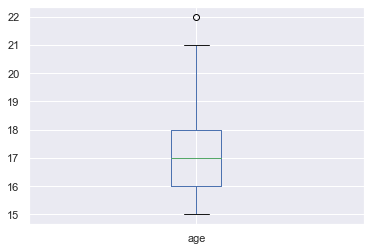

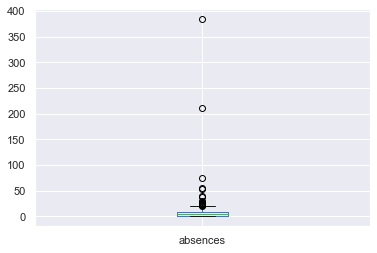

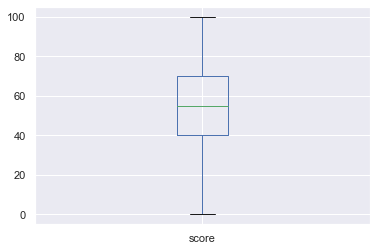

In [414]:
#визуализируем количественные данные
for col in ['age','absences','score']:
    df_numerical[[col]].plot(kind='box')

**Выводы**:
1. **score** - обработки не требует;
2. **age** - технически имеет 1 выброс: значение 22, но по описанию данных это допустимое значение;
3. **absences** - значительное количество выбросов, надо поработать.    

count    389.000000
mean       7.113111
std       23.310047
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

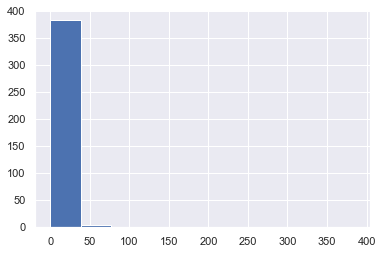

In [415]:
df_numerical.absences.hist()
df_numerical.absences.describe()

Не очень красивое распределение по столбцу **absences**.
Попробуем формула интерквартильного расстояния:

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


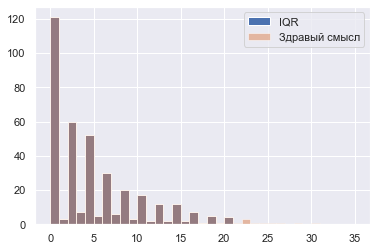

In [416]:
#формула интерквартильного расстояния
IQR = df_numerical.absences.quantile(0.75) - df_numerical.absences.quantile(0.25)
perc25 = df_numerical.absences.quantile(0.25)
perc75 = df_numerical.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
df_numerical.absences.loc[df_numerical.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 35, range = (0, 35), label = 'IQR')

df_numerical.absences.loc[df_numerical.absences <= 35].hist(
alpha = 0.5, bins = 35, range = (0, 35), label = 'Здравый смысл')
 
plt.legend();

На самом деле значений **absences** > 40 всего 5. Видно, что уменьшив их, например в 10 раз,
мы избавимся от выбросов.

In [417]:
df_numerical.absences[df_numerical.absences>35]

74      54
183     56
222    385
276     75
307     38
315     40
390    212
Name: absences, dtype: int32

In [418]:
#df_numerical.loc[(df_numerical.absences>30),'absences'] = round(df_numerical.absences.mean())

In [419]:
df_numerical.absences = df_numerical.absences.apply(lambda x: x if x<40 else round(x/10))

C:\Users\Nata\Anaconda3\envs\meteo\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


count    389.000000
mean       5.210797
std        6.325108
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       38.000000
Name: absences, dtype: float64

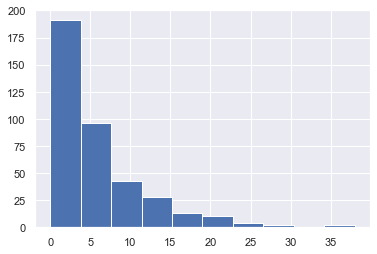

In [420]:
df_numerical.absences.hist()
df_numerical.absences.describe()

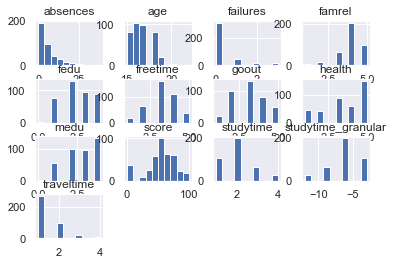

In [422]:
df_numerical.hist();

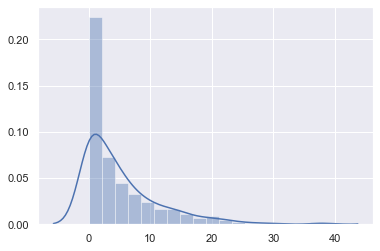

In [423]:
sns.set()
sns.distplot(df_numerical[['absences']]);

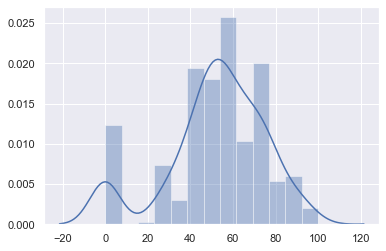

In [424]:
sns.set()
sns.distplot(df_numerical[['score']]);

Посмотрим на корреляцию числовых признаков:

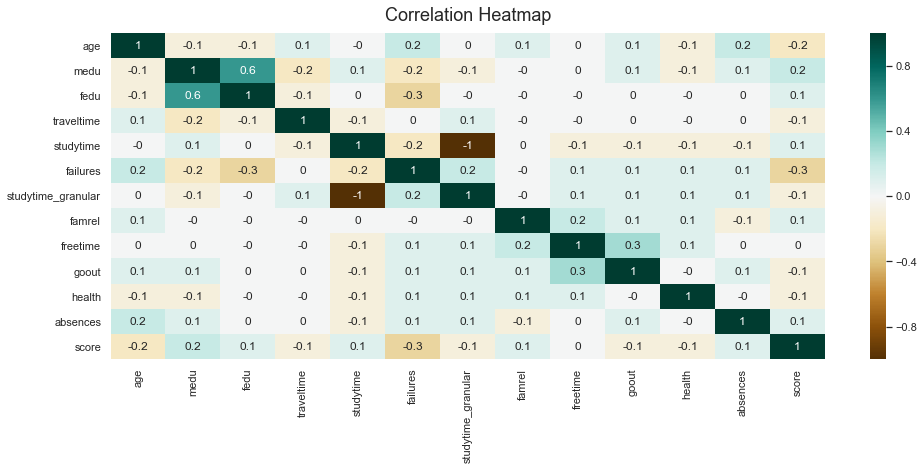

In [425]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_numerical.corr().round(1), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12); 

**Вывод:**
    между колонками **"studytime" и "studytime_granular"** обратная корреляция с коэффициентом -1.
    Поэтому колонку **"studytime_granular"** можно убрать.
    также достаточно высокая корреляция между **fedu** **medu**, уберем **fedu**

In [426]:
df_numerical.drop(['studytime_granular','fedu'], axis=1, inplace=True)

C:\Users\Nata\Anaconda3\envs\meteo\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


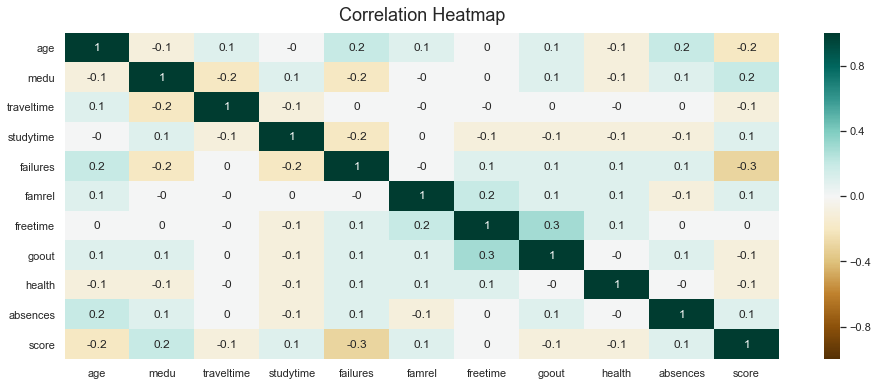

In [427]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df_numerical.corr().round(1), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12); 

**Оставшиеся переменные слабо коррелируют между собой**

Посмотрим заисимости переменных на графиках библиотеки seaborn:

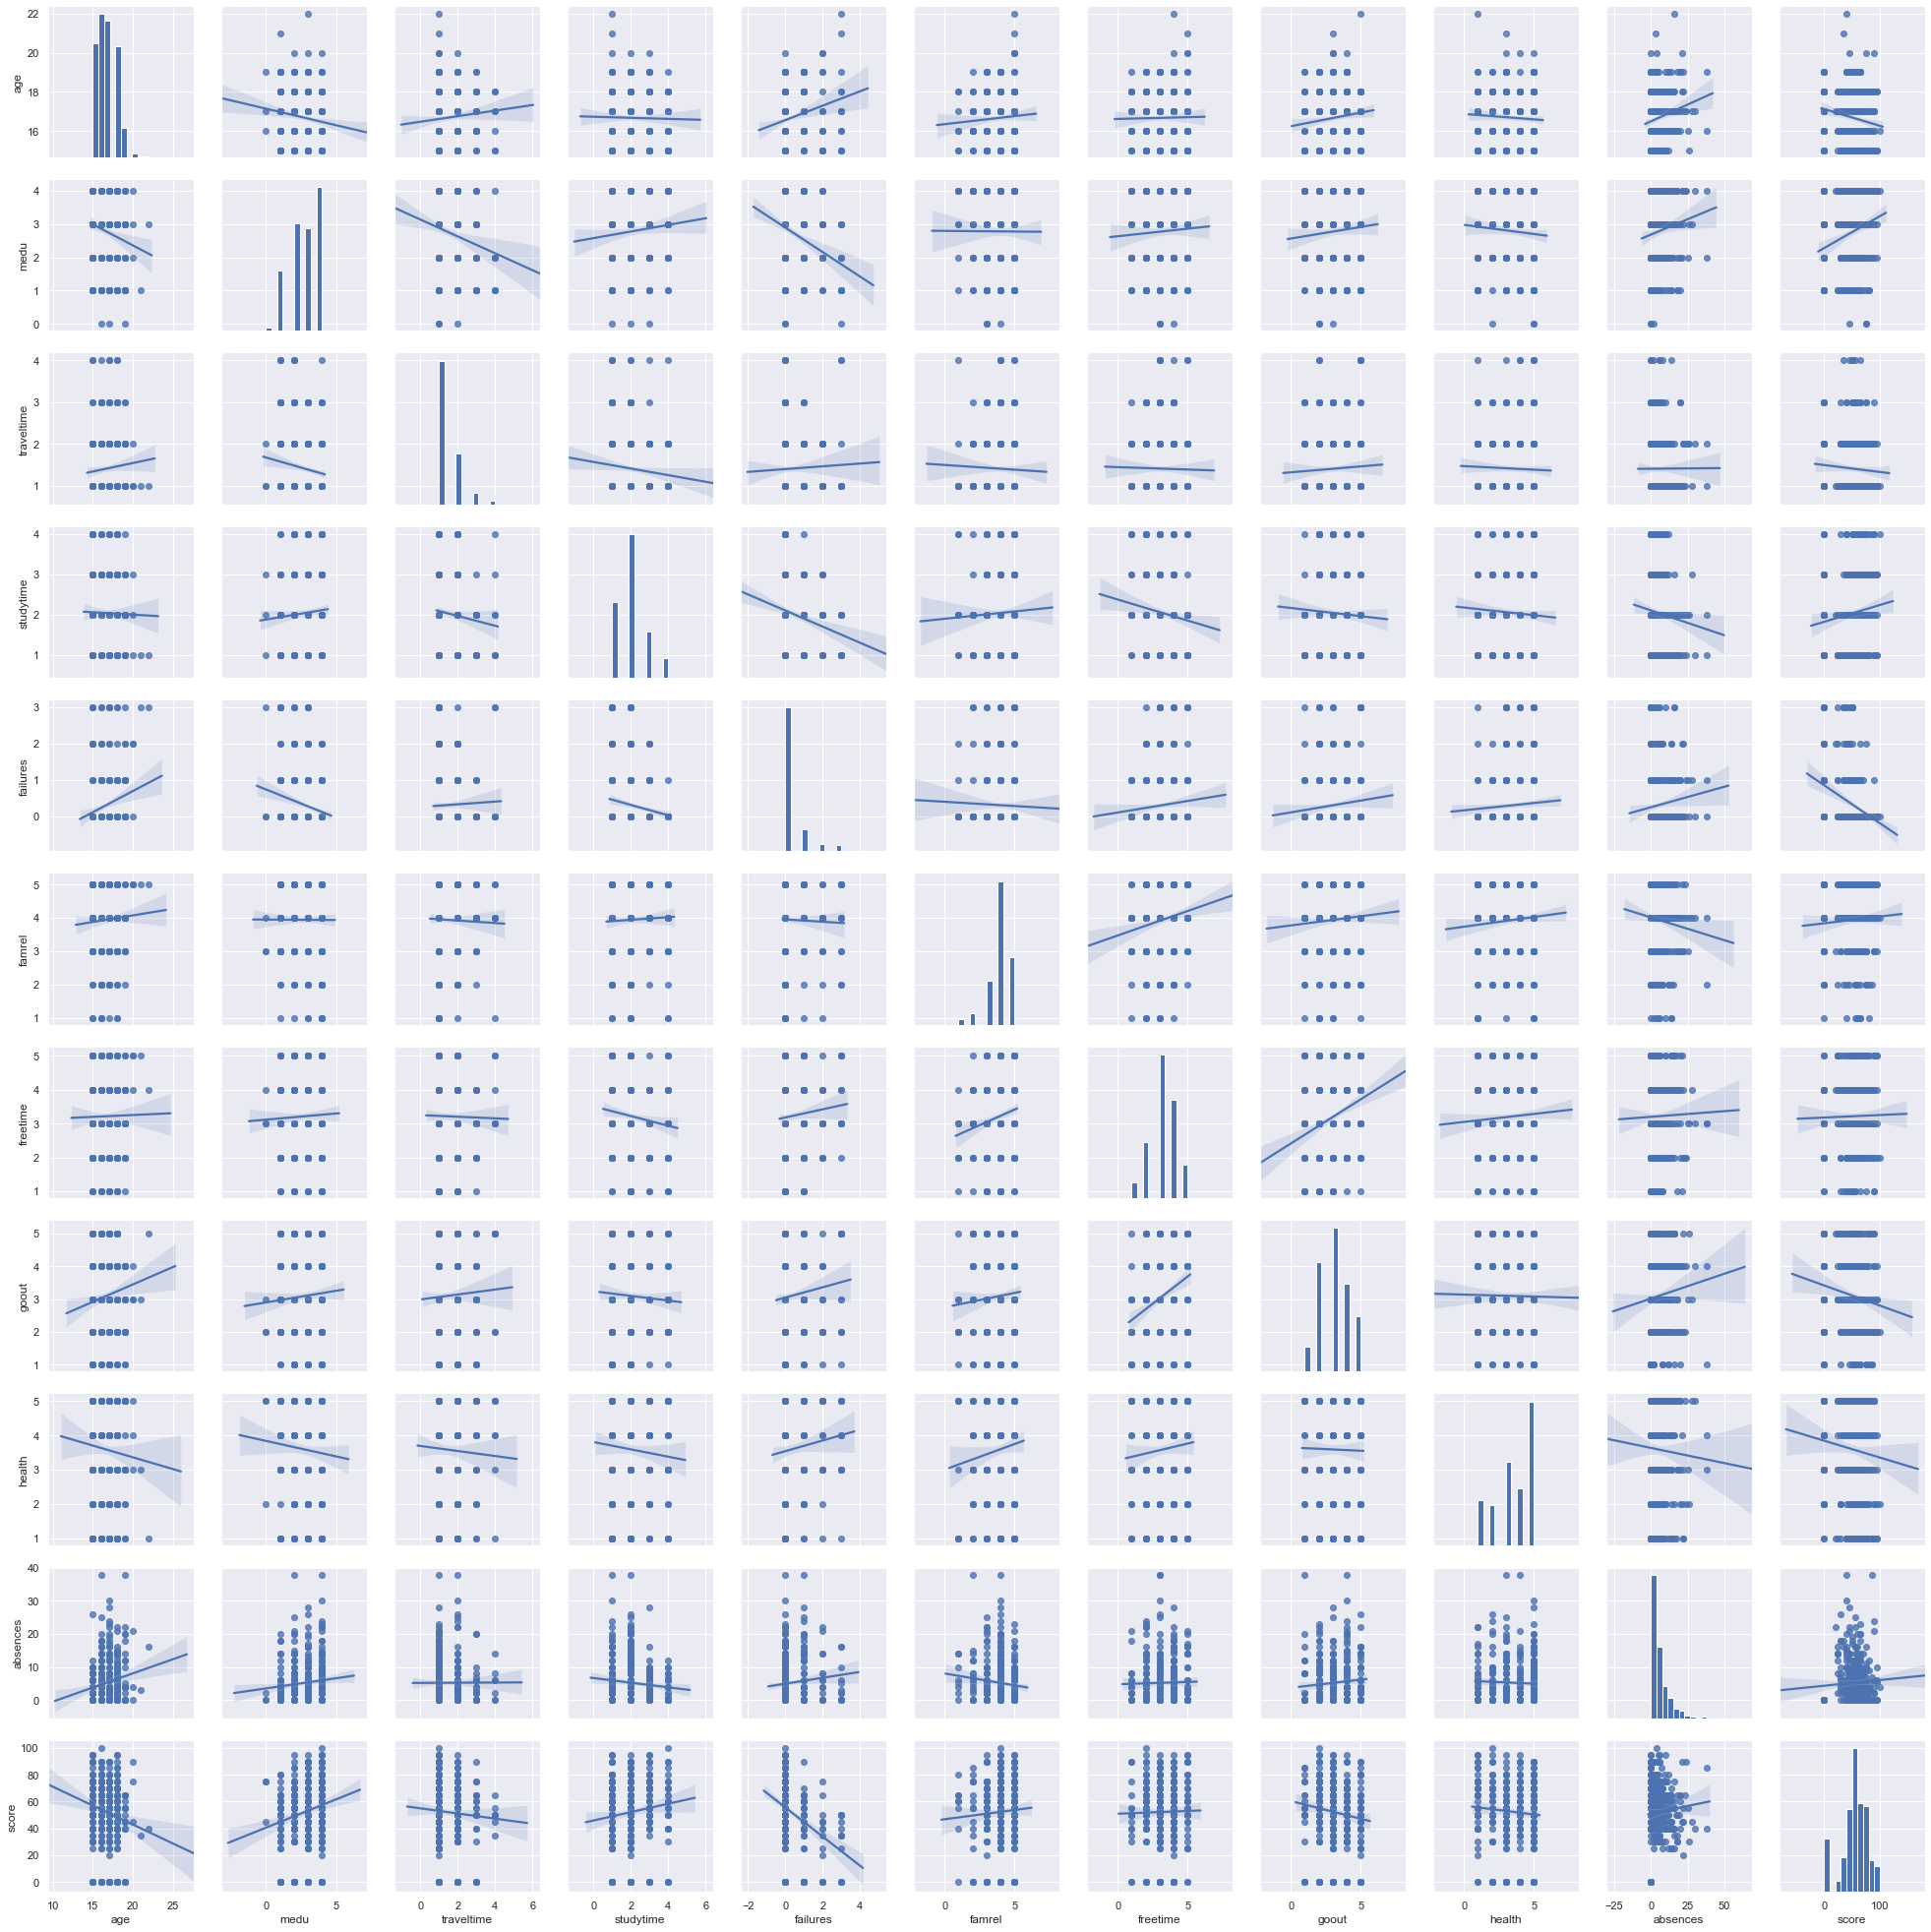

In [428]:
sns.pairplot(df_numerical, kind = 'reg')

**Выводы:**
1. С увеличением возраста оценка на экзамене резко падает (основная гипотеза)    
Это объясняется тем, что
2. С увеличением возраста увеличивается количество прогулов
3. С увеличением возраста студенты начинают больше проводить времени с друзьями
4. С увеличением возраста показатели здоровья постепенно падают
5. С увеличением возраста образование матери все меньше: последнее время растет уровень образования
6. Образование матери положительно влияет на итоговую оценку и уменьшает количество внеучебных провалов 
и уменьшает время в пути до школыи уменьшает возраст студента (матери с образованием начинают беспокоиться о получении образования
своими детьми)
7. Увеличение времени на неурочные доп занятия положительно влияет на итоговую оценку и сокращает время прогулов,
но в тоже время плохо сказывается на здоровье и общении с друзьями и вообще свободное время, но снижает количество неудач
и положительно коррелирует с образованием матери, но никак не зависит от возраста студента
8.Чем больше количество неудач внеурочное время, тем хуже оценка на экзамене




### Категориальные данные

In [429]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 17 columns):
school        389 non-null object
sex           389 non-null object
address       374 non-null object
famsize       362 non-null object
pstatus       344 non-null object
mjob          370 non-null object
fjob          353 non-null object
reason        372 non-null object
guardian      358 non-null object
schoolsup     380 non-null object
famsup        351 non-null object
paid          350 non-null object
activities    375 non-null object
nursery       374 non-null object
higher        369 non-null object
internet      355 non-null object
romantic      358 non-null object
dtypes: object(17)
memory usage: 64.7+ KB


In [430]:
df_categorical.nunique()

school        2
sex           2
address       2
famsize       2
pstatus       2
mjob          5
fjob          5
reason        4
guardian      3
schoolsup     2
famsup        2
paid          2
activities    2
nursery       2
higher        2
internet      2
romantic      2
dtype: int64

Заменим пропуски в категориальных данных модой:

In [431]:
for col in df_categorical.columns:
    df_categorical[col].fillna(df_categorical[col].mode()[0],inplace=True)

C:\Users\Nata\Anaconda3\envs\meteo\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Посмотрим что получилось на графиках:

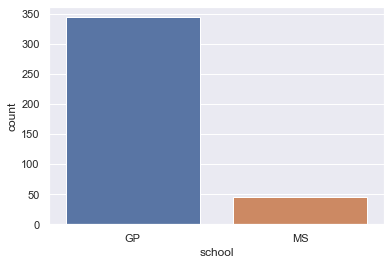

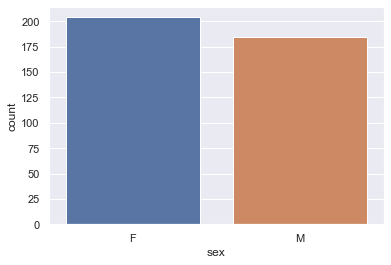

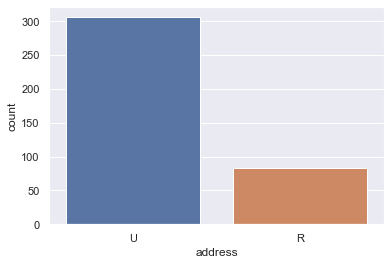

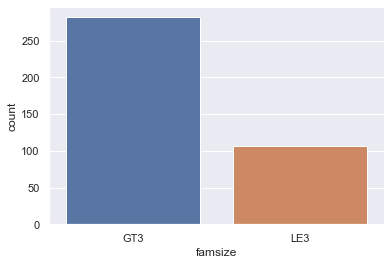

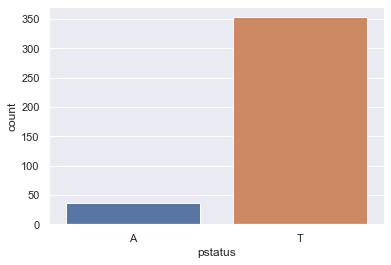

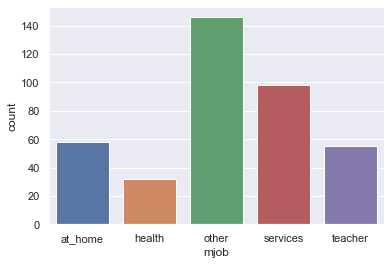

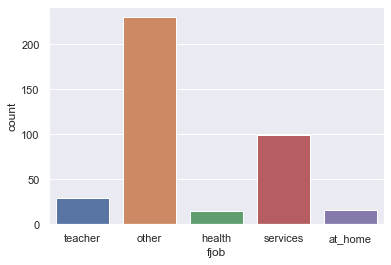

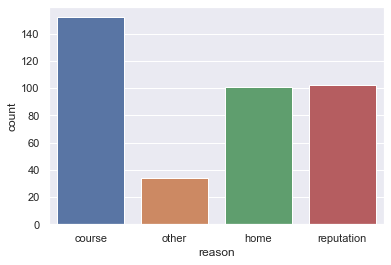

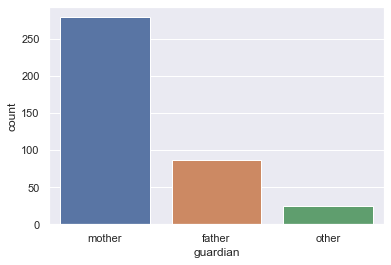

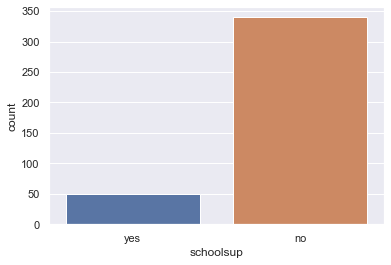

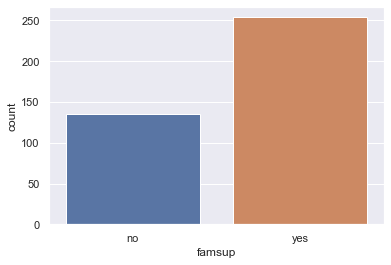

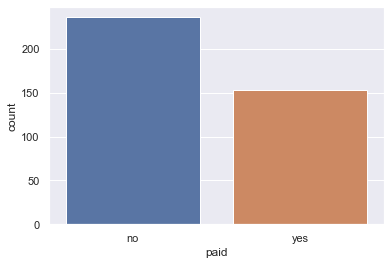

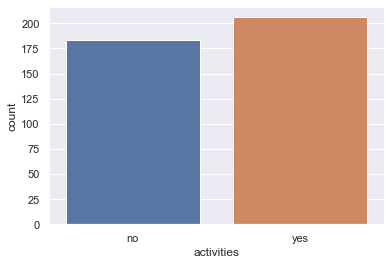

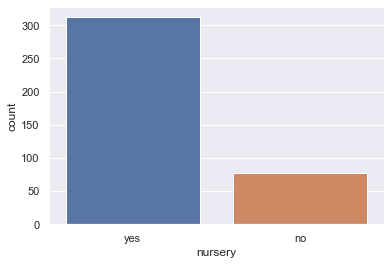

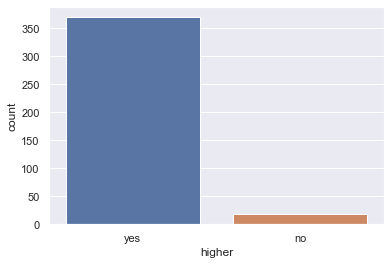

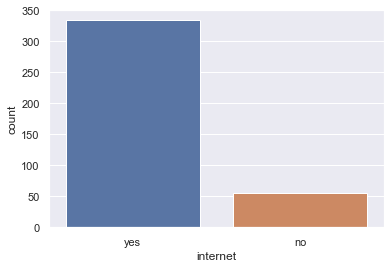

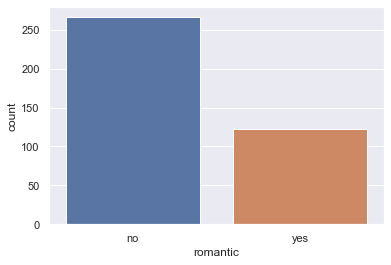

In [432]:
for col in df_categorical.columns:
    sns.countplot(df_categorical[col])
    plt.show()


Очевидно, что данные очищены и в дальнейшем ввиду небольшого количества значений
возможно использования перекодировки **one hot encoding**

In [433]:
#col_to_encode = df_categorical.columns
#for col in col_to_encode:
#    df_categorical_2 = encode_and_bind(df_categorical, col)

In [434]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 17 columns):
school        389 non-null object
sex           389 non-null object
address       389 non-null object
famsize       389 non-null object
pstatus       389 non-null object
mjob          389 non-null object
fjob          389 non-null object
reason        389 non-null object
guardian      389 non-null object
schoolsup     389 non-null object
famsup        389 non-null object
paid          389 non-null object
activities    389 non-null object
nursery       389 non-null object
higher        389 non-null object
internet      389 non-null object
romantic      389 non-null object
dtypes: object(17)
memory usage: 64.7+ KB


### Анализ номинативных переменных

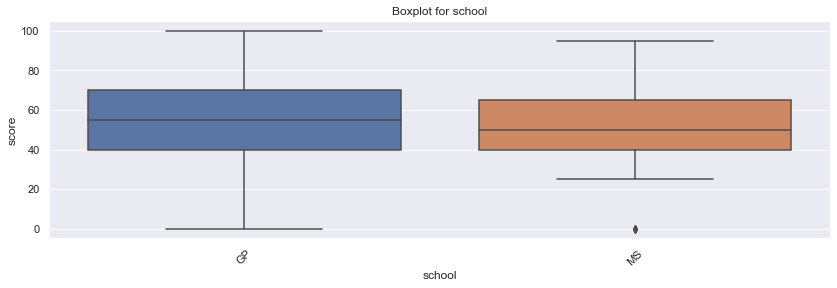

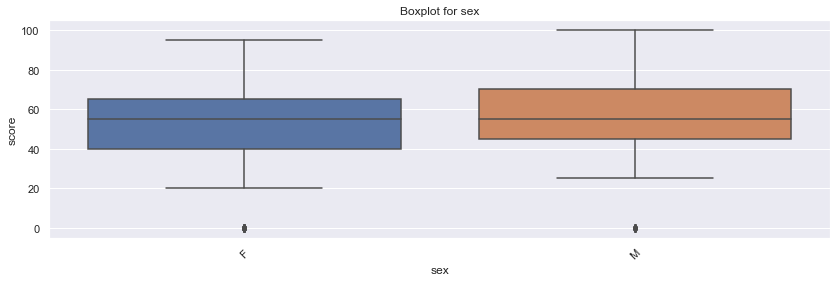

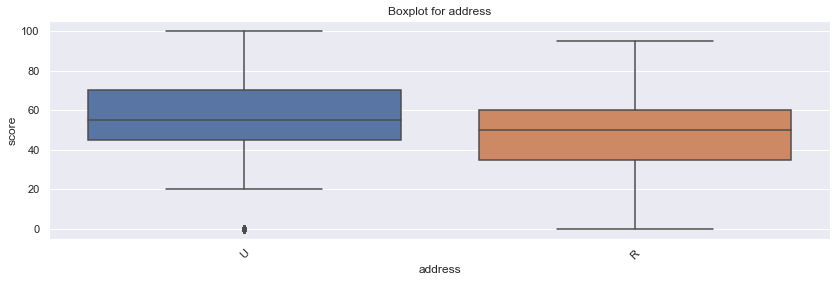

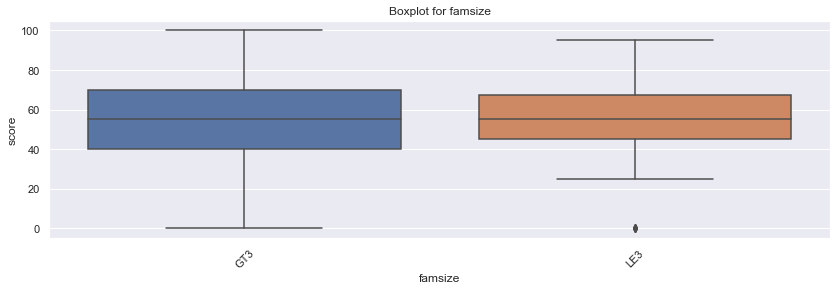

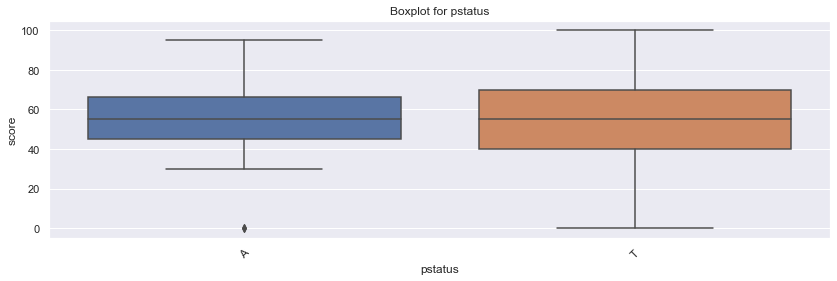

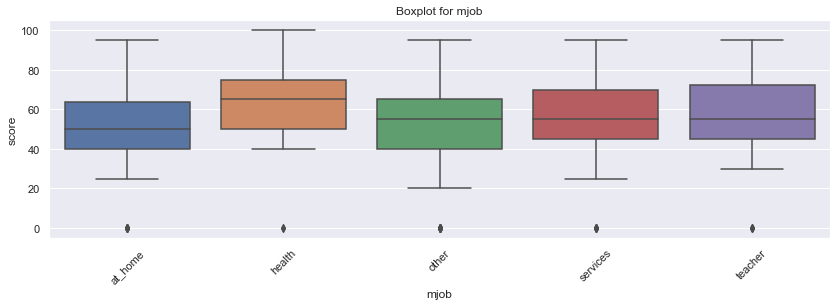

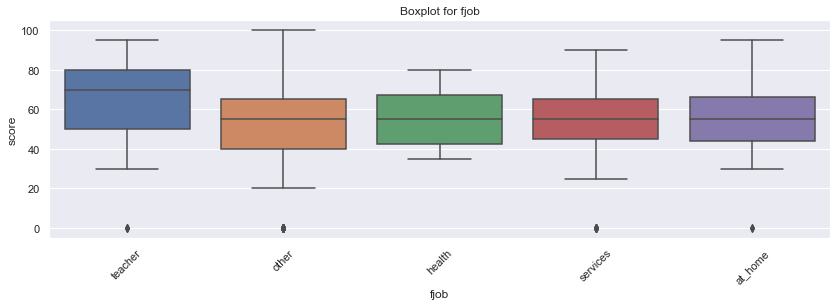

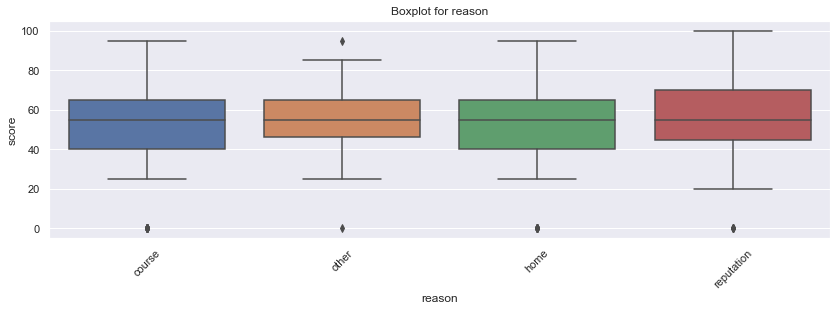

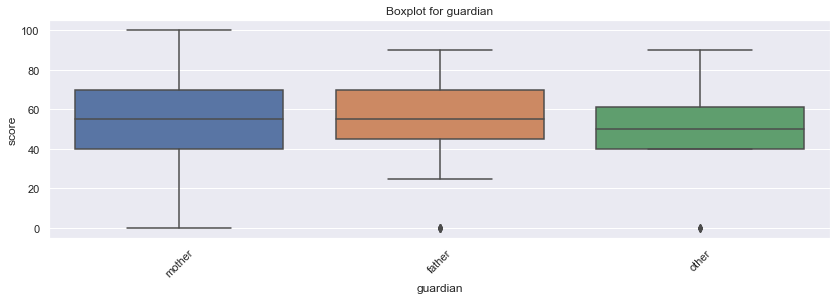

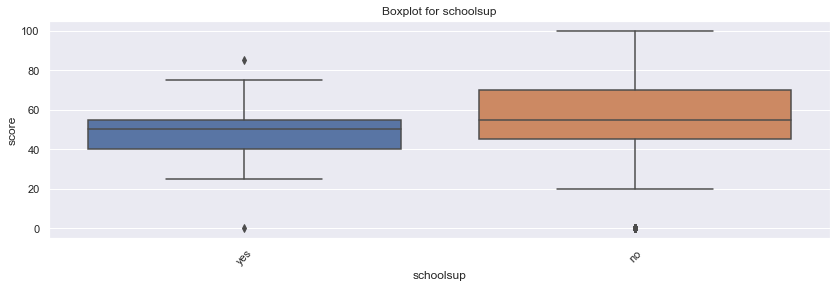

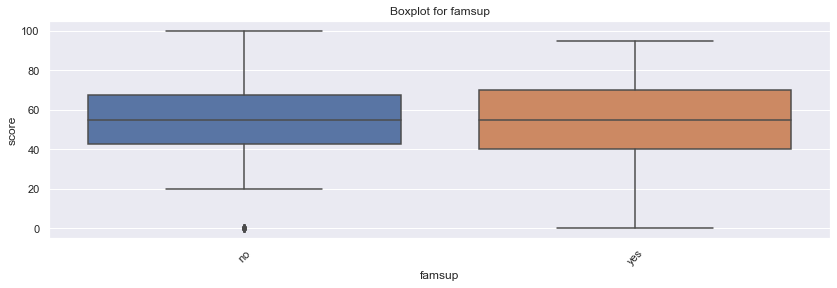

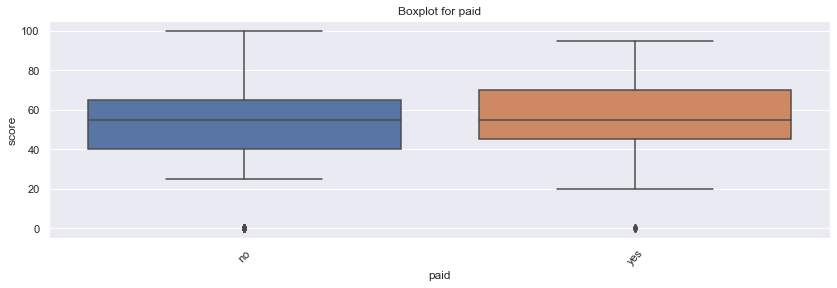

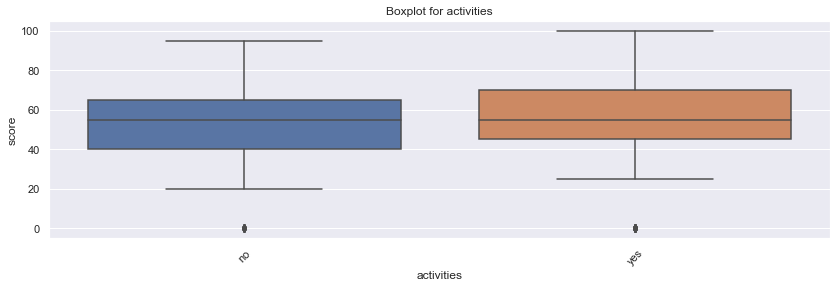

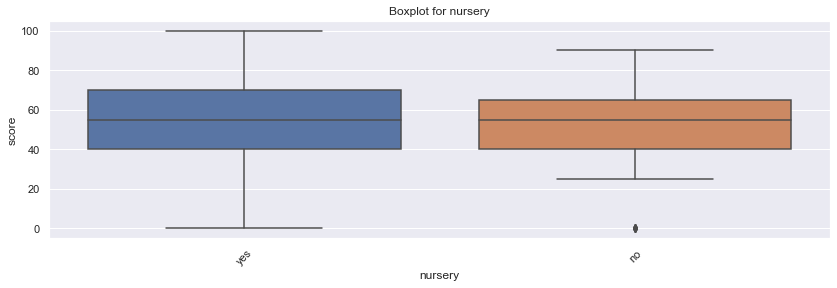

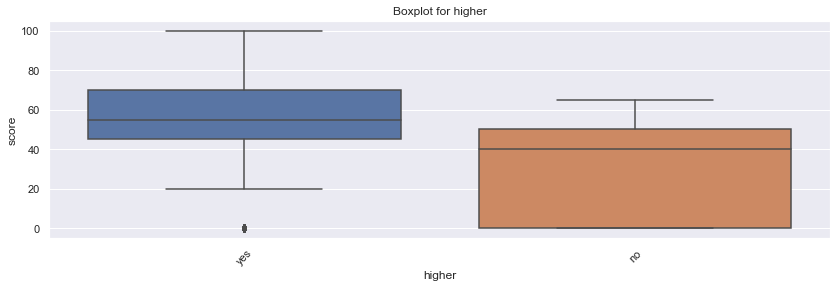

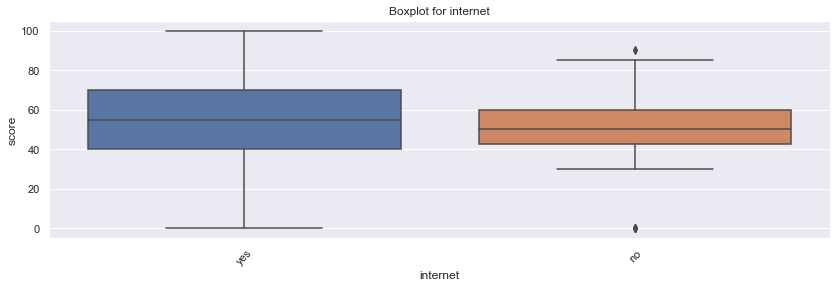

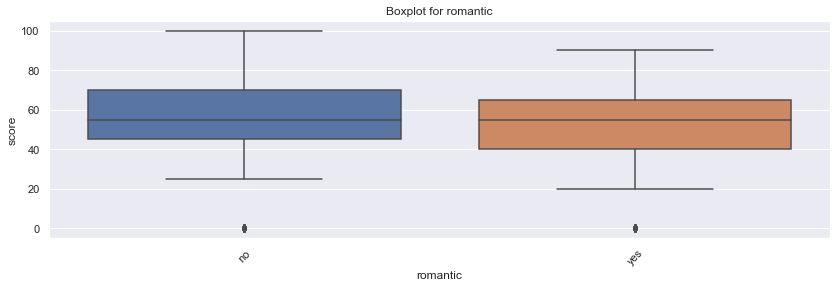

In [435]:
for col in df_categorical.columns: # анализ номинативных переменных
    get_boxplot(col)

 **Выводы:**

Признаки можно убрать из рассмотрения:**"nursery","activities","paid","famsup","reason","fjob","pstatus","famsize","school"**

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. 
Проверим нулевую гипотезу о том, что распределения оценок студентов по различным параметрам неразличимы:

In [436]:
for col in df_categorical.columns: # тест Стьюдента для определения значимости признаков
    get_stat_dif(col)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки romantic


**Вывод**
Тест Стьюдента указывает на поля **address,mjob,higher,romantic**

In [437]:
df_categorical.drop(['school','sex','famsize','pstatus','fjob','reason','guardian','schoolsup'\
                     ,'famsup','paid','activities','nursery','internet'], axis=1, inplace=True)

C:\Users\Nata\Anaconda3\envs\meteo\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [438]:
df_categorical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 4 columns):
address     389 non-null object
mjob        389 non-null object
higher      389 non-null object
romantic    389 non-null object
dtypes: object(4)
memory usage: 25.2+ KB


# Итоговый вывод

Для построения модели я бы использовала следующие параметры:
1. age
2. absences
3. goout
4. health
5. medu
6. traveltime
7. freetime
8. studytime
9. failures
10. famrel
11. address
12. mjob
13. higher
14. romantic